# 第一章笔记

## 什么是NLP

NLP 是让计算机理解、解释和生成人类语言的技术，结合多学科知识，旨在打破人类与计算机语言障碍。它能执行多种语言处理任务，如中文分词、文本分类等，不仅要处理语言表层结构，更要理解深层含义。尽管深度学习使 NLP 取得显著进步，但仍面临处理歧义性等挑战。

## NLP 发展历程
- 早期探索（1940 年代 - 1960 年代）：始于二战后对机器翻译的需求，1950 年图灵提出图灵测试，诺姆・乔姆斯基提出生成语法理论，但当时机器翻译系统简单，效果不佳。

- 符号主义与统计方法（1970 年代 - 1990 年代）：研究者分为符号主义和统计方法两大阵营，80 年代统计模型开始取代复杂规则。

- 机器学习与深度学习（2000 年代至今）：深度学习技术推动 NLP 显著进步，如 RNN、LSTM、注意力机制等广泛应用，Word2Vec 开创词向量表示新时代，BERT 引领预训练语言模型新浪潮，基于 Transformer 的模型如 GPT - 3 能生成高质量文本。


## NLP 任务

### 中文分词

因中文词间无明显分隔，需将连续中文文本切分成有意义的词汇序列，正确分词对后续任务至关重要。具体实现的代码如下：

In [1]:
import jieba
text = "今天天气真好，适合出去游玩。"
words = jieba.lcut(text)
print(words)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\xnlll\AppData\Local\Temp\jieba.cache
Loading model cost 0.892 seconds.
Prefix dict has been built successfully.


['今天天气', '真', '好', '，', '适合', '出去', '游玩', '。']


### 补充知识点：Jieba库

Jieba库是优秀的中文分词第三方库，中文文本需要通过分词获得单个的词语。
(pip install jieba)

Jieba库的分词原理：利用一个中文词库，确定汉字之间的关联概率，汉字间概率大的组成词组，形成分词结果。除了分词，用户还可以添加自定义的词组。

Jieba库分词有3种模式：
- 精确模式：将文本精确地切分成词语，不存在冗余词语。
- 全模式：将文本中所有可能的词语都切分出来，存在冗余。
- 搜索引擎模式：在精确模式基础上，对发现的那些长的词语，我们会对它再次切分，进而适合搜索引擎对短词语的索引和搜索。也有冗余。

代码分别是：

In [ ]:
import jieba
#精确模式
print(jieba.lcut('平二川，定三足，恍惚草堂梦里，挥斥千古风流'))

['平二川', '，', '定三足', '，', '恍惚', '草堂', '梦里', '，', '挥斥', '千古', '风流']


In [ ]:
#全模式
print(jieba.lcut('平二川，定三足，恍惚草堂梦里，挥斥千古风流',cut_all=True))

['平', '二', '川', '，', '定', '三', '足', '，', '恍惚', '草堂', '梦', '里', '，', '挥斥', '千古', '古风', '风流']


In [ ]:
# 搜索引擎模式
print(jieba.lcut_for_search('平二川，定三足，恍惚草堂梦里，挥斥千古风流'))

['平二川', '，', '定三足', '，', '恍惚', '草堂', '梦里', '，', '挥斥', '千古', '风流']


## 子词切分

将词汇分解为更小的子词，适用于处理词汇稀疏问题，常见方法有 BPE、WordPiece 等。

下面是实现代码：

In [ ]:
#BPE方法
#注：合并之后字符之间是没有空格的
import re
from collections import defaultdict
def get_stats(vocab):
    """计算字符对的频率"""
    pairs = defaultdict(int)
    for word, freq in vocab.items():
        symbols = word.split()
        for i in range(len(symbols)-1):
            pairs[symbols[i], symbols[i+1]] += freq
    return pairs
def merge_vocab(pair, v_in):
    """合并最频繁的字符对"""
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    for word in v_in:
        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word]
    return v_out
vocab = {'l o w': 5, 'l o w e r': 2, 'n e w e s t': 6, 'w i d e s t': 3}
num_merges = 3  # 合并次数
for i in range(num_merges):
    pairs = get_stats(vocab)
    if not pairs:
        break
    best = max(pairs, key=pairs.get)
    vocab = merge_vocab(best, vocab)
    print(f"合并步骤 {i+1}: {best}")
    print(f"更新后的词汇表: {vocab}\n")
# 输出最终的子词词典
print("最终子词词典:", vocab)

合并步骤 1: ('e', 's')
更新后的词汇表: {'l o w': 5, 'l o w e r': 2, 'n e w es t': 6, 'w i d es t': 3}

合并步骤 2: ('es', 't')
更新后的词汇表: {'l o w': 5, 'l o w e r': 2, 'n e w est': 6, 'w i d est': 3}

合并步骤 3: ('l', 'o')
更新后的词汇表: {'lo w': 5, 'lo w e r': 2, 'n e w est': 6, 'w i d est': 3}

最终子词词典: {'lo w': 5, 'lo w e r': 2, 'n e w est': 6, 'w i d est': 3}


In [28]:
# 示例：WordPiece实现（简化版）
import re
from collections import defaultdict, Counter
def get_stats(vocab):
    """计算字符对的频率"""
    pairs = defaultdict(int)
    for word, freq in vocab.items():
        symbols = word.split()
        for i in range(len(symbols)-1):
            pairs[symbols[i], symbols[i+1]] += freq
    return pairs
def compute_score(pair, counts):
    """计算WordPiece合并得分"""
    return counts.get(pair, 0)
def merge_vocab(pair, v_in):
    """合并最频繁的字符对"""
    v_out = {}
    bigram = ' '.join(pair)
    replacement = ''.join(pair)
    for word in v_in:
        if bigram in word:
            new_word = word.replace(bigram, replacement)
            v_out[new_word] = v_in[word]
    return v_out
vocab = {'l o w': 5, 'l o w e r': 2, 'n e w e s t': 6, 'w i d e s t': 3}
num_merges = 3  # 合并次数
for i in range(num_merges):
    pairs = get_stats(vocab)
    if not pairs:
        break
    # 计算每个字符对的得分（这里简化为频率）
    scores = {pair: compute_score(pair, pairs) for pair in pairs}
    best = max(scores, key=scores.get)
    vocab = merge_vocab(best, vocab)
    print(f"合并步骤 {i+1}: {best}")
    print(f"更新后的词汇表: {vocab}\n")
print("最终子词词典:", vocab)

合并步骤 1: ('e', 's')
更新后的词汇表: {'n e w es t': 6, 'w i d es t': 3}

合并步骤 2: ('es', 't')
更新后的词汇表: {'n e w est': 6, 'w i d est': 3}

合并步骤 3: ('n', 'e')
更新后的词汇表: {'ne w est': 6}

最终子词词典: {'ne w est': 6}


## 词性标注

为文本中每个单词分配**词性标签**，基于机器学习模型，如 HMM、CRF 等。

下面将会分别使用HMM、CRF进行代码演示

### HMM 词性标注器实现
隐马尔可夫模型 (HMM) 通过计算隐藏状态 (词性) 和观察序列 (词语) 之间的**概率关系**来进行词性标注。

以下是一个简化的 HMM 词性标注器实现：

In [ ]:
#HMM模型演示代码
import numpy as np
from collections import defaultdict, Counter
class HMMPOSTagger:
    def __init__(self):
        self.transition_counts = defaultdict(Counter)  # 状态转移计数
        self.emission_counts = defaultdict(Counter)    # 发射计数
        self.state_counts = Counter()                  # 状态计数
        self.states = set()                            # 词性集合
        self.vocab = set()                             # 词汇表
    def train(self, sentences):
        """训练HMM模型"""
        for sentence in sentences:
            prev_tag = None
            for word, tag in sentence:
                # 更新发射计数
                self.emission_counts[tag][word] += 1
                # 更新状态计数
                self.state_counts[tag] += 1
                # 更新转移计数
                if prev_tag is not None:
                    self.transition_counts[prev_tag][tag] += 1
                prev_tag = tag
                # 添加到状态集和词汇表
                self.states.add(tag)
                self.vocab.add(word)
        # 转换为概率矩阵
        self.states = sorted(self.states)
        self.vocab = sorted(self.vocab)
        self.state_index = {s: i for i, s in enumerate(self.states)}
        self.word_index = {w: i for i, w in enumerate(self.vocab)}
        # 初始化转移矩阵和发射矩阵
        n_states = len(self.states)
        n_words = len(self.vocab)
        self.transition_matrix = np.zeros((n_states, n_states))
        self.emission_matrix = np.zeros((n_states, n_words))
        # 填充转移矩阵
        for prev_state in self.states:
            prev_idx = self.state_index[prev_state]
            total = sum(self.transition_counts[prev_state].values())
            for next_state in self.states:
                next_idx = self.state_index[next_state]
                self.transition_matrix[prev_idx, next_idx] = (
                    self.transition_counts[prev_state][next_state] / total if total > 0 else 0
                )  
        # 填充发射矩阵
        for state in self.states:
            state_idx = self.state_index[state]
            total = self.state_counts[state]
            for word in self.vocab:
                word_idx = self.word_index[word]
                self.emission_matrix[state_idx, word_idx] = (
                    self.emission_counts[state][word] / total if total > 0 else 0
                )

    def viterbi(self, words):
        """使用Viterbi算法进行词性标注"""
        n = len(words)
        m = len(self.states)
        # 初始化Viterbi矩阵和回溯矩阵
        viterbi = np.zeros((n, m))
        backpointer = np.zeros((n, m), dtype=int)
        # 处理第一个词
        for i, state in enumerate(self.states):
            # 如果词在词汇表中，使用发射概率
            if words[0] in self.word_index:
                word_idx = self.word_index[words[0]]
                emission_prob = self.emission_matrix[i, word_idx]
            else:
                # 未知词处理，使用均匀概率
                emission_prob = 1.0 / len(self.vocab) if self.vocab else 1.0
            # 假设初始状态概率均匀
            viterbi[0, i] = emission_prob / m
            backpointer[0, i] = 0
        # 递推计算后续词
        for t in range(1, n):
            for j, state in enumerate(self.states):
                max_prob = -1
                max_state = 0
                # 如果词在词汇表中，使用发射概率
                if words[t] in self.word_index:
                    word_idx = self.word_index[words[t]]
                    emission_prob = self.emission_matrix[j, word_idx]
                else:
                    # 未知词处理
                    emission_prob = 1.0 / len(self.vocab) if self.vocab else 1.0
                for k, prev_state in enumerate(self.states):
                    transition_prob = self.transition_matrix[k, j]
                    current_prob = viterbi[t-1, k] * transition_prob * emission_prob
                    if current_prob > max_prob:
                        max_prob = current_prob
                        max_state = k
                viterbi[t, j] = max_prob
                backpointer[t, j] = max_state
        # 回溯最优路径
        best_path = [0] * n
        best_path[-1] = np.argmax(viterbi[-1, :])
        for t in range(n-2, -1, -1):
            best_path[t] = backpointer[t+1, best_path[t+1]]
        # 将状态索引转换为词性标签
        state_to_tag = {i: s for s, i in self.state_index.items()}
        return [state_to_tag[i] for i in best_path]
    def tag(self, sentence):
        """对句子进行词性标注"""
        return self.viterbi(sentence)

#使用示例
# 训练数据
train_data = [
    [("I", "PRP"), ("love", "VBP"), ("natural", "JJ"), ("language", "NN"), ("processing", "NN")],
    [("Natural", "JJ"), ("language", "NN"), ("processing", "NN"), ("is", "VBZ"), ("fun", "NN")]
]
# 测试句子
test_sentence = ["I", "love", "natural", "language", "processing"]
# 训练HMM模型
hmm_tagger = HMMPOSTagger()
hmm_tagger.train(train_data)
# 进行词性标注
tags = hmm_tagger.tag(test_sentence)
print("HMM词性标注结果:", list(zip(test_sentence, tags)))

HMM词性标注结果: [('I', 'PRP'), ('love', 'VBP'), ('natural', 'JJ'), ('language', 'NN'), ('processing', 'NN')]


可以看到，根据输入的测试结果，我们可以很容易的就把单词对应的词性完整的标注出来。

### CRF 词性标注器实现

条件随机场 (CRF) 是一种判别式概率模型，特别适合序列标注任务。

在这里我们使用sklearn-crfsuite库来实现 CRF 词性标注器：

需要提前下载：pip install sklearn-crfsuite

In [ ]:
import numpy as np
from sklearn_crfsuite import CRF
from sklearn_crfsuite.metrics import flat_f1_score

class CRFPOSTagger:
    def __init__(self):
        self.model = CRF(
            algorithm='lbfgs',
            c1=0.1,
            c2=0.1,
            max_iterations=100,
            all_possible_transitions=True
        )
    def word2features(self, sentence, i):
        """提取特征"""
        word = sentence[i]
        features = {
            'bias': 1.0,
            'word.lower()': word.lower(),
            'word[-3:]': word[-3:],
            'word[-2:]': word[-2:],
            'word.isupper()': word.isupper(),
            'word.istitle()': word.istitle(),
            'word.isdigit()': word.isdigit(),
        }
        # 前一个词的特征
        if i > 0:
            prev_word = sentence[i-1]
            features.update({
                '-1:word.lower()': prev_word.lower(),
                '-1:word.istitle()': prev_word.istitle(),
                '-1:word.isupper()': prev_word.isupper(),
            })
        else:
            features['BOS'] = True  # 句首标记
        # 后一个词的特征
        if i < len(sentence) - 1:
            next_word = sentence[i+1]
            features.update({
                '+1:word.lower()': next_word.lower(),
                '+1:word.istitle()': next_word.istitle(),
                '+1:word.isupper()': next_word.isupper(),
            })
        else:
            features['EOS'] = True  # 句尾标记
            
        return features  
    
    def sent2features(self, sentence):
        """为句子中的每个词提取特征"""
        return [self.word2features(sentence, i) for i in range(len(sentence))]  
    def train(self, X_train, y_train):
        """训练CRF模型"""
        X_features = [self.sent2features(s) for s in X_train]
        self.model.fit(X_features, y_train)
    def tag(self, sentence):
        """对句子进行词性标注"""
        features = self.sent2features(sentence)
        return self.model.predict_single(features)
    
# 训练数据示例
X_train = [
    ["I", "love", "natural", "language", "processing"],
    ["Natural", "language", "processing", "is", "fun"]
]
y_train = [
    ["PRP", "VBP", "JJ", "NN", "NN"],
    ["JJ", "NN", "NN", "VBZ", "NN"]
]
#此时是一一对应的
# 测试句子
test_sentence = ["I", "love", "natural", "language", "processing"]

# 训练CRF模型
crf_tagger = CRFPOSTagger()
crf_tagger.train(X_train, y_train)

# 进行词性标注
tags = crf_tagger.tag(test_sentence)
print("CRF词性标注结果:", list(zip(test_sentence, tags)))

CRF词性标注结果: [('I', 'PRP'), ('love', 'VBP'), ('natural', 'JJ'), ('language', 'NN'), ('processing', 'NN')]


## 文本分类

将给定文本自动分配到预定义类别，广泛应用于情感分析等场景，深度学习用于文本分类成趋势。

演示代码如下：

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

texts = ["NBA季后赛将于下周开始，湖人和勇士将在首轮对决。", "美国总统宣布将提高关税，引发国际贸易争端。", "苹果公司发布了新款 Macbook，配备了最新的m3芯片。"]
labels = ["体育", "政治", "科技"]

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])
pipeline.fit(texts, labels)
new_text = "苹果公司发布了新款 Macbook，配备了最新的m3芯片。"
predicted = pipeline.predict([new_text])
print(predicted)

new_text = "美国总统宣布将提高关税，引发国际贸易争端。"
predicted = pipeline.predict([new_text])
print(predicted)

new_text = "新的足球赛事即将开启"
predicted = pipeline.predict([new_text])
print(predicted)

new_text = "湖人和勇士将在首轮对决。"
predicted = pipeline.predict([new_text])
print(predicted)

['科技']
['政治']
['体育']
['体育']


## 实体识别

自动识别文本中特定意义的实体并分类，对信息提取等应用重要。

演示代码如下：
（pip install spacy）

In [ ]:
import re
import jieba
import jieba.posseg as pseg
class SimpleNER:
    def __init__(self):
        # 定义实体类型和对应的正则表达式模式
        self.entity_patterns = {
            'PERSON': re.compile(r'[李王张刘陈杨黄赵吴周徐孙马朱胡林郭何高罗郑梁谢宋唐韩曹许邓萧冯曾程蔡彭潘袁于董余苏叶吕魏蒋田杜丁沈姜范江傅钟卢汪戴崔任陆廖姚方金邱夏谭韦贾邹石熊孟秦阎薛侯雷白龙段郝孔邵史毛常万顾赖武康贺严尹钱施牛洪龚]'
                               r'[伟芳娜秀英敏静强磊军洋勇艳杰涛明超李刚健亮玲建芳玉春秀大伟国庆解放]'
                               r'(?:[伟芳娜秀英敏静强磊军洋勇艳杰涛明超李刚健亮玲建芳玉春秀大伟国庆解放])?'),
            'GPE': re.compile(r'[京津沪渝蒙新藏宁桂港澳]|'
                            r'[省市县镇村区]$|'
                            r'(?:中国|北京|上海|天津|重庆|河北|山西|辽宁|吉林|黑龙江|江苏|浙江|安徽|福建|江西|山东|河南|湖北|湖南|广东|海南|四川|贵州|云南|陕西|甘肃|青海|台湾|香港|澳门)'),
            'DATE': re.compile(r'\d{4}年\d{1,2}月\d{1,2}日|\d{1,2}月\d{1,2}日|\d{4}年'),
            'ORG': re.compile(r'(?:公司|集团|学校|大学|医院|研究院|中心|局|厅|部|委员会|政府|协会|学会|报社|出版社|银行|商场|酒店)$')
        }
    def recognize_entities(self, text):
        """识别文本中的实体"""
        entities = []
        # 分词并获取词性
        words = pseg.cut(text)
        # 基于正则表达式的实体识别
        for word, pos in words:
            for entity_type, pattern in self.entity_patterns.items():
                if pattern.search(word):
                    entities.append((word, entity_type))
        # 处理日期实体（结合上下文）
        date_pattern = self.entity_patterns['DATE']
        for match in date_pattern.finditer(text):
            entities.append((match.group(0), 'DATE'))
        # 处理组织机构名（结合词性）
        org_words = []
        for word, pos in words:
            if pos.startswith('n') and re.search(self.entity_patterns['ORG'], word):
                org_words.append(word)
                entities.append((word, 'ORG'))
        
        return entities

# 使用示例
ner = SimpleNER()
text = "李雷和韩梅梅是北京市海淀区的居民，他们计划在2024年4月7日去上海旅行。"
entities = ner.recognize_entities(text)
print("识别的实体:", entities)

识别的实体: [('北京市', 'GPE'), ('海淀区', 'GPE'), ('上海', 'GPE'), ('2024年4月7日', 'DATE')]


# 文本表示的发展历程
## 词向量

向量空间模型（VSM）将文本转换为高维空间向量，但存在数据稀疏性和维数灾难问题。

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ["雍和宫的荷花很美"]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X.toarray())

['雍和宫的荷花很美']
[[1]]


## 语言模型

N - gram 模型基于马尔可夫假设，实现简单，但存在数据稀疏性问题，且忽略词间范围依赖关系。

In [34]:
def tokenize(text):
    """简单分词函数，按空格分割并去除标点"""
    # 去除常见标点符号
    punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    text_clean = text.translate(str.maketrans('', '', punctuation))
    # 按空格分割为单词列表
    return text_clean.split()

def generate_ngrams(tokens, n):
    """生成n-gram序列"""
    if n < 1:
        raise ValueError("n必须为正整数")
    # 确保tokens长度足够生成n-gram
    if len(tokens) < n:
        return []
    # 生成n-gram
    ngrams_list = []
    for i in range(len(tokens) - n + 1):
        ngram = tuple(tokens[i:i+n])
        ngrams_list.append(ngram)
    return ngrams_list

# 示例使用
text = "The quick brown fox"
# 分词
tokens = tokenize(text)
# 生成trigram（三元组）
trigrams = generate_ngrams(tokens, 3)
print(trigrams)

[('The', 'quick', 'brown'), ('quick', 'brown', 'fox')]


## Word2Vec

基于神经网络，生成低维密集向量，能捕捉词间语义关系，但无法捕捉长距离依赖关系。

In [35]:
import numpy as np
from collections import defaultdict
class SimpleWord2Vec:
    def __init__(self, embedding_dim=10):
        self.embedding_dim = embedding_dim  # 词向量维度
        self.word_to_idx = {}  # 词到索引的映射
        self.idx_to_word = {}  # 索引到词的映射
        self.vocab_size = 0    # 词汇表大小
        self.embeddings = None # 词向量矩阵
    def fit(self, sentences, window_size=2):
        """基于共现矩阵训练简单词向量"""
        # 构建词汇表
        vocab = set()
        for sentence in sentences:
            vocab.update(sentence)
        self.vocab_size = len(vocab)
        self.word_to_idx = {word: i for i, word in enumerate(vocab)}
        self.idx_to_word = {i: word for word, i in self.word_to_idx.items()}
        # 初始化共现矩阵
        cooccurrence_matrix = np.zeros((self.vocab_size, self.vocab_size))
        # 填充共现矩阵（统计窗口内词的共现次数）
        for sentence in sentences:
            sentence_idx = [self.word_to_idx[word] for word in sentence]
            for i, idx in enumerate(sentence_idx):
                # 窗口范围内的上下文词
                start = max(0, i - window_size)
                end = min(len(sentence_idx), i + window_size + 1)
                for j in range(start, end):
                    if i != j:
                        cooccurrence_matrix[idx][sentence_idx[j]] += 1

        # 简化版：直接使用共现矩阵的SVD分解获取词向量（模拟Word2Vec的稠密表示）
        # 对共现矩阵进行SVD分解
        u, s, vh = np.linalg.svd(cooccurrence_matrix)
        # 取左奇异矩阵的前embedding_dim列作为词向量
        self.embeddings = u[:, :self.embedding_dim]

    def __getitem__(self, word):
        """获取词对应的向量"""
        if word not in self.word_to_idx:
            raise KeyError(f"词 '{word}' 不在词汇表中")
        return self.embeddings[self.word_to_idx[word]]


# 训练数据
sentences = [["国王", "王后"], ["男人", "女人"]]

# 初始化并训练模型（向量维度设为5，简化输出）
model = SimpleWord2Vec(embedding_dim=5)
model.fit(sentences)

# 获取"国王"的词向量
print("国王的词向量:", model["国王"])
print("王后的词向量:", model["王后"])
print("男人的词向量:", model["男人"])

国王的词向量: [ 0. -1.  0.  0.]
王后的词向量: [ 0.  0. -1.  0.]
男人的词向量: [ 0.  0.  0. -1.]


# NLP实战

学习了前面的代码实现与基础概念，接下来，我们来进行一下项目实践！

本次我们学习补充的是对于文本的情感分类

数据集以放入对应的doc文档当中了，点击即可使用！

正在加载和预处理数据...
正在提取特征...
正在训练模型...
正在评估模型...
模型准确率: 0.8707
分类报告:
              precision    recall  f1-score   support

    negative       0.88      0.93      0.91      1594
    positive       0.84      0.75      0.80       804

    accuracy                           0.87      2398
   macro avg       0.86      0.84      0.85      2398
weighted avg       0.87      0.87      0.87      2398



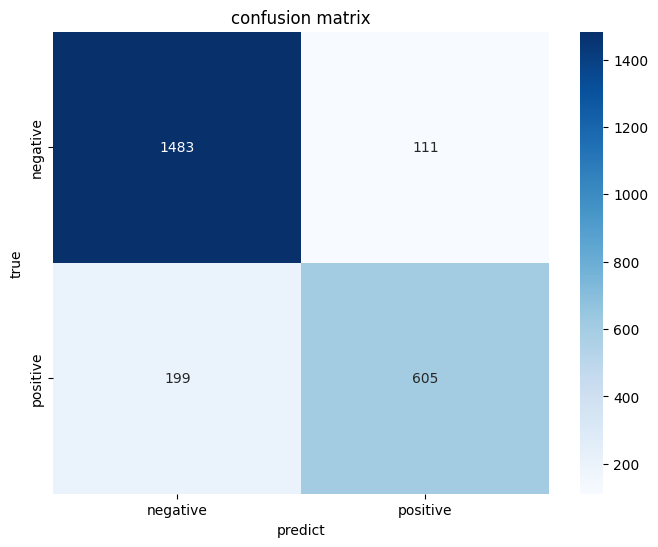


===== 情感分析测试示例 =====

文本: 就一点牛肉酱一点味也没有，，太差了
真实标签: negative
预测标签: negative
预测概率: 负面 0.9458, 正面 0.0542
--------------------------------------------------

文本: 一般，饭有些硬
真实标签: negative
预测标签: negative
预测概率: 负面 0.7778, 正面 0.2222
--------------------------------------------------

文本: 送达了？送哪去了，已经是第二次了。你们搞什么啊？浪费我的一份订单？要是不想做生意就别开了。
真实标签: negative
预测标签: negative
预测概率: 负面 0.9721, 正面 0.0279
--------------------------------------------------

文本: 注明了不放香菜，结果送来满满的全是香菜。带汤的面条，汤和面没分开盛放，送来直接全糊了，今天注定要饿肚子了，28块钱2个多小时等待打水漂了，差到极致的外卖！！！！！
真实标签: negative
预测标签: negative
预测概率: 负面 0.9473, 正面 0.0527
--------------------------------------------------

文本: 米线没问题、可是送来汤全洒了、写了要带辣椒也没有带
真实标签: negative
预测标签: negative
预测概率: 负面 0.9478, 正面 0.0522
--------------------------------------------------


In [ ]:
import pandas as pd
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 数据加载与预处理
def load_and_preprocess_data(file_path):
    # 加载数据
    df = pd.read_csv(file_path)
    # 分词处理
    df['words'] = df['review'].apply(lambda x: ' '.join(jieba.cut(x)))
    # 划分训练集和测试集
    X = df['words']
    y = df['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# 特征提取
def extract_features(X_train, X_test):
    # 使用TF-IDF提取文本特征
    vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)
    return X_train_tfidf, X_test_tfidf, vectorizer

# 模型训练
def train_model(X_train_tfidf, y_train):
    # 使用朴素贝叶斯分类器
    model = MultinomialNB()
    model.fit(X_train_tfidf, y_train)
    return model

# 模型评估
def evaluate_model(model, X_test_tfidf, y_test):
    # 预测
    y_pred = model.predict(X_test_tfidf)
    # 计算准确率
    accuracy = accuracy_score(y_test, y_pred)
    print(f"模型准确率: {accuracy:.4f}")
    # 打印分类报告
    print("分类报告:")
    print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))
    # 绘制混淆矩阵
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
    plt.xlabel('predict')
    plt.ylabel('true')
    plt.title('confusion matrix')
    plt.show()
    return y_pred

# 测试示例
def show_test_examples(X_test, y_test, y_pred, vectorizer, model, n=5):
    # 随机选择n个测试样本
    indices = np.random.choice(len(X_test), n, replace=False)
    print("\n===== 情感分析测试示例 =====")
    for i in indices:
        text = X_test.iloc[i]
        true_label = y_test.iloc[i]
        pred_label = y_pred[i]
        # 原始文本
        original_text = ''.join(text.split())
        # 预测概率
        probs = model.predict_proba(vectorizer.transform([text]))[0]
        neg_prob, pos_prob = probs[0], probs[1]
        
        print(f"\n文本: {original_text}")
        print(f"真实标签: {'positive' if true_label == 1 else 'negative'}")
        print(f"预测标签: {'positive' if pred_label == 1 else 'negative'}")
        print(f"预测概率: 负面 {neg_prob:.4f}, 正面 {pos_prob:.4f}")
        print("-" * 50)

#文件地址
file_path = "./waimai_10k.csv"
# 数据加载与预处理
print("正在加载和预处理数据...")
X_train, X_test, y_train, y_test = load_and_preprocess_data(file_path)
# 特征提取
print("正在提取特征...")
X_train_tfidf, X_test_tfidf, vectorizer = extract_features(X_train, X_test)
# 模型训练
print("正在训练模型...")
model = train_model(X_train_tfidf, y_train)
# 模型评估
print("正在评估模型...")
y_pred = evaluate_model(model, X_test_tfidf, y_test)
# 展示测试示例
show_test_examples(X_test, y_test, y_pred, vectorizer, model)